# Time value of money

## Basic terms

### Units
* Money is measured in units of USD, CNY, EUR, etc. Most often USD.
* Time is measured in units of days, weeks, months or years. Most often days or years.

Sometimes units are not written, so $\,T=1\,$ means one year, and $\,1\,$ unit of money means, for example, $\,1\,$ USD.

### Names of time points and time lengths
* Current values are often called `spot`, for example the spot price of a stock is its price right now.
* The final time point of a contract is usually called the contract's `maturity`.
  * So the `time to maturity` of a contract is the amount of time from now until the contract's maturity.
* The length of a contract from its start to its end is usually called the `tenor` of the contract.
 

## Discount Factor and Present Value (PV)
Alice and Bob set up a contract that starts now and ends at $\,T=1\,$:
* Right now (at time $\,t=0)\,$ Alice pays to Bob a fixed amount of money
* In return, at time $\,t=T=1\,$ Bob will pay to Alice $\,1\,$ unit of money

### To make this a fair contract ...
 **... how much should Alice pay to Bob right now ?**

Let us denote by $\,P\,(\,1\,)\,$ this amount. This number is called the Discount Factor for tenor 1.

Note that $\,P\,(\,0\,)=1\,$.


<center>
    <img src="./img/Present-Value-1-Year.png" width="400" alt="Simple rate 1 year.">
    <br/>
    The $\,P\left(\,1\,\right)\,$ discount factor in a 1-year contract between Alice and Bob.
</center>

### What does the discount factor depend on ?

The time span $\,T\,$ , _for example_, $\,T=1\,$ is different from $\,T=5\,$

The currency , _for example_, USD pays differently from CHF.

### What if Alice thinks that Bob may not pay (or not fully) at maturity ?
   
If there is a possibility that Bob may not pay the agreed amount at maturity,<br/>then Alice should pay less than $\,P\left(\,1\,\right)\,$ at the start of the contract.

This difference reflects how much Alice trust Bob, and it is not part of the discount factor. 

Also, there are further risks related to the contract's environment.
 
### Present Value (PV)

In the above contract the Bob's payment $-$ which is at maturity $-$ has $\,P\left(\,1\,\right)\,$ at the start time.

Note the general pattern: a future payment has a PV now.

## Task: PV of a series of fixed payments

In a contract Alice and Bob agree that
<br/>
(a) Right now Alice transfers to Bob a single payment of size $\,N\,$.
<br/>
(b) In return Bob will pay back to Alice $\,k=20\,$ separate payments of size  $\,m=1\,$ at the ends of years $\,1, 2, \dots, k\,$ from now.

##### Question
If the yearly discount factor will always be $\,D=0.98\,$, then what is the sum of the PVs of the fixed payments?

In other words, what $\,N\,$ value makes this a fair contract ?

##### Help

What is the PV of the $\,1\,$ unit of currency paid a fixed number of years from now ?

##### Answer

The PV of the payment at the end of year $\,1\,$ is $\,m\,D\,$.

The PV of the payment paid at the end of year $\,2\,$ is $\,m\,D^{\,2}\,$.

The sum of the PVs of all $\,k=20\,$ payments is 
$\,N = m\,\displaystyle{\sum_{j=1}^{k} D^{\,j} } = m\,\left(\,\frac{D^{\,k\,+\,1}-1}{D-1}-1\,\right)\,$.

In [1]:
import numpy as np

# This D is the yearly Discount Factor. In the current task this D is the same for every year.
m = 1.0
D = 0.98
k = 20

PV = m * np.sum([np.power(D, y) for y in range(1, k + 1)])
# same value in summed form:
# PV = m * ( ( D ** ( k + 1 ) - 1 ) / ( D - 1 ) - 1 )

print(f'PV = {PV:.2f}')

PV = 16.29


# Simple rate and Forward rate

## Simple rate

It is also called: the `simple discount rate`, or the `discount rate`.

### Simple rate for 1 year

Alice and Bob set up a contract:
* Right now (at $\,t=0)\,$ Alice pays to Bob $\,1\,$ unit of currency (for example, 1 USD)
* In return, at $\,t=1\,$ Bob will pay to Alice a fixed amount 

Let's denote by $\,1+L\,(\,t=1\,)\,$ the fixed amount that Bob will pay.

This $\,L\,(\,1\,)\,$ is called the `currently observed 1-year simple rate`.

<center>
    <img src="./img/Simple-Rate-1-Year.png" width="400" alt="Simple rate 1 year.">
    <br/>
    The $\,L\left(\,1\,\right)\,$ simple rate in a 1-year contract between Alice and Bob.
</center>

### Connecting the Discount Factor with the Simple Rate

Based on the definitions of the Discount Factor and the Simple Rate, note that 

$\,P\,\left(\,1\,\right)\,\cdot\,\big(\,1+L\,(\,1\,)\,\big) = 1\,$

therefore,

$\,L\,(\,1\,)=\displaystyle{\frac{1}{P\,(\,1\,)}-1}\,$.


### Note: Compare simple rates of currencies

For $\,t=1\,$ a real-life quantity closely related to the USD simple rate is [displayed here](https://ycharts.com/indicators/1_year_treasury_rate).<br/>
This is the interest that banks paid to each other on 12-month USD loans at each indicated time point in the past.

For a comparison among several currencies, please see the `Yield` column at<br/>
https://www.investing.com/rates-bonds/world-government-bonds?maturity_from=90&maturity_to=90 .

### Simple rate for T years

Let us allow <b>both integer and non-integer</b> values of $\,T\,$ , for example $\,T=2\,$ or $\,T=\displaystyle{\frac{1}{2}}\,$.

Again, Alice and Bob set up a contract:
* Right now (at $\,t=0)\,$ Alice pays to Bob $\,1\,$ unit of currency
* In return, at $\,t=T\,$ Bob will pay to Alice a fixed amount 

To make this a `fair contract` Bob will pay $\,1+ T \cdot L\,(\,T\,)\,$. This is the definition of $\,L\,(\,T\,)\,$.

As before, the connection to the discount factor is: $\,L\,(\,T\,)=\displaystyle{\frac{1}{T} \cdot \left(\frac{1}{P\,(\,T\,)}\,-1\right)}$.

#### Task: Simple rate for T years
In the $\,T$-year long contract of Alice and Bob assume that there is a <b>constant yearly discount factor</b>, $\,0<D<1\,$.

Use this $\,D\,$ to calculate the value of $\,L\,(\,T\,)$.

##### Help
Find the connection between $\,P\,(\,T\,)\,$, the constant yearly $\,D\,$ and $\,T\,$.

##### Answer
Use (a) the definition of the discount factor and (b) the definition of the simple rate:

(a) The $\,1\,$ unit of currency that is paid $\,T\,$ years from now has a PV of $\,D^{\,T}\,$
<br/>

(b) From the definition of the simple rate: $\,L\,(\,T\,)=\displaystyle{\frac{1}{T} \cdot \left(\,D^{\,-\,T}\,-1\,\right)}$

Observe that a constant yearly discount factor implies an increasing simple rate as the tenor grows.

In [2]:
import numpy as np

D = 0.98

for T in range(1, 6):
    L = (np.power(D, -1.0 * T) - 1.0) / T
    print(f'T = {T}, L = {L:.4f}')

T = 1, L = 0.0204
T = 2, L = 0.0206
T = 3, L = 0.0208
T = 4, L = 0.0210
T = 5, L = 0.0213


## Forward rate

Let us move the starting point of the contract into the future, to a $\,t>0\,$ time point.

* The contract is set up now, at time $\,0\,$.
* At time $\,t>0\,$ in the future Alice will pay to Bob $\,1\,$ unit of currency
* In return, at $\,T>t\,$ Bob will pay to Alice the fixed amount $\,1+\left(T-t\right) \cdot F\,(\,0,\,t,\,T\,)\,$

Here $\,F\,(\,0,\,t,\,T\,)\,$ is called the `forward rate`. The first argument is 0, in other words, $\,F\,$ is our current knowledge of the simple rate from $\,t\,$ to $\,T\,$. 

The first argument is often omitted when it is $\,0\,$. So we simply write $\,F\,(\,t,\,T\,)\,$ and, accordingly,<br/>$\,\displaystyle{P\,(\,t,\,T\,)=\frac{1}{1+\left(\,T-t\,\right)\, F\left(\,t, T\,\right)}}\,$.

### Task: Forward rate
If the 5-year and 10-year discount factors are $\,P(5)=0.8\,$ and $\,P(10)=0.5\,$, then what is $\,F(5,10)\,$?

##### Answer
(a) From the definition of the discount factor: $\,P\left(0,\,10\right)=P\left(0,\,5\right) P\left(5,\,10\right)\,$.

(b) From the definition of the forward rate: $\,\displaystyle{F\left(5, 10\right) = \frac{1}{10-5} \left(\frac{1}{P\left(5, 10\right)} -1 \right)}\,$.

From (a) insert $\,P\left(5,\,10\right)\,$ into (b) to get $\,\displaystyle{F\left(5, 10\right) = \frac{1}{5} \left(\frac{P\left(0,\,5\right)}{P\left(0, 10\right)} -1 \right)=\frac{3}{25}=0.12\,}$.

# Rates for short times

## Short rate. Also called: instantaneous spot rate.

Alice and Bob set up a contract:
* Right now (at $\,t=0)\,$ Alice pays to Bob $\,1\,$ unit of currency
* In return, at $\,t<T\ll 1\,$ Bob will pay to Alice $\,1+ T \cdot L\,(\,T\,)\,$

The `short rate` , $\,r\,$, is the limiting value of the simple rate: 

$\,\displaystyle{
{\color{red}r = \lim_{T\,\to\,0}L\,(\,T\,)} = 
\lim_{T\,\to\,0}\left(\frac{\frac{1}{P\,(\,T\,)}-1}{T}\right) = 
\lim_{T\,\to\,0}\left(-\,\,\frac{1-\frac{1}{P\,(\,T\,)}}{T}\right) = 
\lim_{T\,\to\,0}\left(-\,\,\frac{\frac{P\,(\,T\,)}{P\,(\,T\,)}-\frac{P\,(\,0\,)}{P\,(\,T\,)}}{T-0}\right) = \\
\,\,\,\, = \lim_{T\,\to\,0}\left(\frac{-\,1}{P\,(\,T\,)}
          \cdot\frac{P\,(\,T\,)-P\,(\,0\,)}{T - 0}\right) = 
{\color{red}-\,\frac{\partial}{\partial\,T}\Bigg|_{\,T\,=\,0}\!\!\ln\big(P\,(\,T\,)\big)}
}\,$

### Connect a constant r with the 1-year simple rate

##### Question
Connect a `constant` $\,r\,$ short rate with $\,L\left(\,1\,\right)\,$.
##### Answer
$(1) \,\,\,$ The definition of the short rate is: 
$\, \displaystyle{\,r=-\,\frac{\partial}{\partial\,T}\Bigg|_{\,T\,=\,0}\!\!\!\ln\,\left(\,P\,\left(\,T\,\right)\,\right)}\,$.

$(2) \,\,\,$ With a `constant` $\,r\,$ this gives 
$\,\displaystyle{P\,\left(\,T\,\right)=e^{\,-\,r\,T}}\,$.

$(3) \,\,\,$ The 1-year discount factor and simple rate are connected by 
$\,\displaystyle{P\,(\,1\,)=\frac{1}{1+L\,(\,1\,)}}\,$.

$(4) \,\,\,$ Merge $\,(2)\,$ and $\,(3)\,$ and apply $\,T=1\,$ to get
$\,\,\displaystyle{e^{\,-\,r}=\frac{1}{1+L\,(\,1\,)}}\,$.

## Instantaneous forward rate

Again, let us move the starting point of the contract into the future, to a time point $\,t>0\,$.

Now Alice and Bob set up the following contract:

* At a selected time point in the future (at $\,t>0$)$\,$ Alice will pay to Bob $\,1\,$
* In return, a very short time later (at $\,t<T$)$\,$ Bob will pay to Alice $\,1+\left(T-t\right) \cdot F\,(\,t,\,T\,)$

For a very short $\,T\,$ this simple rate becomes the `instantaneous forward rate`:

$\,\displaystyle{f\left(\,t\,\right) = \lim_{T\,\to\,t}F\,(\,t,\,T\,)=-\,\frac{\partial}{\partial\,T}\Bigg|_{\,T\,=\,t}\!\!\ln\big(P\,(\,t,\,T\,)\big)}$.

Note that the instantaneous spot rate is the $\,t=0\,$ special case: $\,r=f\left(\,0\,\right)\,$.

## Integral form of the Discount Factor
Integrating the definition of the instantaneous forward rate gives ${\displaystyle P\,(\,t,\,T\,)=\exp\left(-\int_t^T \!\!f(\tau)\,d\tau\right)}\,$.

## Task: Instantaneous rates
The instantaneous rate, $\,f(t)\,$, is currently 1\% and it grows linearly by 0.2\% per year.

What is the 1Y $\rightarrow$ 11Y forward rate ? 

Help: With the provided $\,f(t)\,$ calculate first $\,P\,(\,1,\,11\,)\,$, and then $\,F\,(\,1,\,11\,)\,$. 

##### Answer
(a) From the definition of the forward rate: $\,\displaystyle{F\left(1, 11\right) = \frac{1}{11-1} \cdot \left(\frac{1}{P\left(1, 11\right)} -1 \right)}\,$.

(b) From the definition of the instantaneous forward rate: $\,\displaystyle{P\,(\,1,\,11\,)=\exp\left(-\int_1^{11} \!\! (0.01 + 0.002\tau)\,d\tau\,\right)=\exp\big(-\left(0.1+0.12\right)\,\big)}$.

Combining (a) and (b) gives $\,\displaystyle{F\left(1, 11\right) = \frac{\exp\,(\,0.22\,)-1}{10}}\approx 2.46\%\,$.

In [3]:
import numpy as np

# 1Y -> 11Y forward rate
F_1_11 = (np.exp(0.22) - 1.0) / 10.0

print(f'F_1_11 = {F_1_11 * 100:.2f}%')

F_1_11 = 2.46%


### Instantaneous forward rate vs Simple rate

##### Question
If the simple rate is a known differentiable $\,L\left(\,t\,\right)\,$ function, then what is the $\,f\left(\,t\,\right)\,$ instantaneous forward rate ?

##### Help
With $\,T=t+dt\,$ use the definitions to calculate first $\,P\left(\,t,\,T\,\right)\,$, and then $\,f\left(\,t\,\right)\,$.

##### Answer

(1) From the definition of the discount factor $\,P\left(\,T\,\right)=P\left(\,t\,\right) \cdot P\left(\,t,\,T\,\right)\,$, therefore, $\,\displaystyle{P\left(\,t,\,T\,\right)=\frac{P\left(\,T\,\right)}{P\left(\,t\,\right)}}\,$. 

(2) Inserting the $\displaystyle{P\left(t\right)=\frac{1}{1+t\,L\left(t\right)}}$ definition of the simple rate into (1) gives $\,\displaystyle{P\left(\,t,\,T\,\right)}=\frac{1+t\,L\left(t\right)}{1+T\,L\left(T\right)}\,$.

(3) The definition of the instantaneous forward rate is 
$\,\displaystyle{f\left(t\right)=-\,\frac{\partial}{\partial\,T}\Bigg|_{\,T\,=\,t}\!\!\ln\big(P\,(\,t,\,T\,)\big)}\,$.

(4) Inserting (2) into (3) gives
$\,\displaystyle{f\left(t\right)=-\,\frac{\partial}{\partial\,T}\Bigg|_{\,T\,=\,t}\!\!\ln\Bigg(\frac{1+t\,L\left(t\right)}{1+T\,L\left(T\right)}\Bigg)}\,$.

(5) Performing the differentiation in (4) and applying $\,T=t\,$ gives &nbsp;&nbsp;
$\,\color{red}{\displaystyle{f\left(t\right)=\frac{L\left(t\right)+t\,L'\!\left(t\right)}{1+t\,L\left(t\right)}}}\,$. 

# Compounded interest

##### Task

Calculate interest for a tenor between instantaneous (zero length limiting case) and 1 year.


For example, the 6-month rate is constant over time, and calculate the 1-year rate from it.

## Discrete Compounding

Alice and Bob set up two consecutive contracts.

1. The first contract covers the `first 6 months`:
 * right now (at $\,t=0)\,$ Alice pays to Bob $\,1\,$ unit of currency 
 * at $\,t=\frac{1}{2}\,$ Bob pays back to Alice the invested $\,1\,$ amount with interest: $\,1+\frac{1}{2}\,L\left(\frac{1}{2}\right)\,$


2. The second contract covers the `second 6 months`:
 * at $\,t=\frac{1}{2}\,$ Alice immediately pays to Bob the same amount that she just received: $\,1 + \frac{1}{2}\,L\left(\frac{1}{2}\right)\,$ 
 * at $\,t=1\,$ Bob pays back to Alice the invested amount with interest: $\,\big(1+\frac{1}{2}\,L\left(\frac{1}{2}\right)\,\big) \cdot \big(1+\,\frac{1}{2}\,F\left(\frac{1}{2}, 1\,\right)\,\big)\,$
 

### What is the equivalent simple rate for the entire tenor ?

In other words, `what is the equivalent discount factor` ?

Note that the above 2-step sequence has to be equivalent to a simple 1-year contract.

In other words, their final payoffs are equal:

$\,\displaystyle{1+L\left(\,1\,\right)=\Bigg(1+\frac{1}{2}\,L\left(\frac{1}{2}\right)\,\Bigg) \cdot \Bigg(1+\,\frac{1}{2}\,F\left(\frac{1}{2}, 1\,\right)\,\Bigg)}\,$

If the 6-month rate is constant, $-$ in other words, $\,L\left(\frac{1}{2}\right)=F\left(\frac{1}{2}, 1\right)\,$, $-$ then :

$1 + \,\displaystyle{L\left(\,1\,\right)=\,\left(1+\frac{1}{2}\,L\!\left(\frac{1}{2}\right)\right)^{2}}\,.$

### Naming conventions for discrete compounding
If we use discrete compounding with $\,n\,$ steps per year, then $\,n\cdot L\!\left(\frac{1}{n}\right)\,$ is the yearly rate,<br/>
and $\,n\,$ is called the `compounding frequency`.<br/>


For example, if Alice deposits her money at Bob's bank at a rate of $\,4\%\,$ with quarterly compounding,<br/>
then at the end of each quarter she will receive $\,1\%\,$ interest on her current balance.

#### Task: Deposit with discrete compounding
Your 5-year deposit of $\,N=100\,$ HUF receives $\,r=4\%\,$ with either annual ($n=1$) or semi-annual ($n=2$) compounding.

* At maturity ($\,T=5\,$) how much will you receive if the compounding frequency is $\,n=1$ ? How much with $\,n=2\,$ ?
* In these two cases what is the equivalent simple rate ?

Note that here $\,N\,$ is called `notional`.

###### Answer
You will have $\,\displaystyle{N\cdot\left(1+\frac{r}{n}\right)^{n\,T}}\,$. 
The `equivalent simple rate` is $\,\displaystyle{ L\,(\,T\,)=\frac{1}{T} \cdot \left[\,\left(1+\frac{r}{n}\right)^{n\,T}-1\,\right]}\,$.

Please see below for the calculated amounts.

In [4]:
N = 100
r = 0.04
T = 5

print('Compounding frequency, Final amount, Equivalent simple rate')

for n in [1, 2]:  # n: compounding frequency
    multiplier = (1 + r / n) ** (n * T)
    final_amount = N * multiplier
    L = (multiplier - 1.0) / T
    print(f'{n}, {final_amount:.2f}, {L * 100.0:.2f}%')

Compounding frequency, Final amount, Equivalent simple rate
1, 121.67, 4.33%
2, 121.90, 4.38%


## Continuous Compounding

Continuous compounding is the $\,n\to\infty\,$ `limiting case` of discrete compounding.

If the forward rate is the same for each time interval, then the simple rates are

$\,\displaystyle{1+L\left(\,1\,\right)=\,\left(1+\frac{1}{n}\,L\!\left(\frac{1}{n}\right)\right)^{n}}\,$ for $\,n=3, 4, \dots\,$

### What is the limiting value of the right hand side ?

In the $\,n\to\infty\,$ limit the $\,\frac{1}{n}\,$ argument of the simple rate $\,L\,$ goes to zero, and very close to zero the simple rate is a constant. It is $\,\mathcal{o}\left(\,1\,\right)\,$.

Therefore, the limit can be taken separately for the simple rate first.

Note that the replacement of the blue part here is by the definition of the instantaneous rate:

$\,\displaystyle{
\lim_{n\,\to\,\infty}\left(1+\frac{1}{n}\,L\!\left(\frac{1}{n}\right)\right)^{n} = 
\lim_{n\,\to\,\infty}\left(1+\frac{1}{n} \,\color{blue}{\left[ \lim_{n\,\to\,\infty}\! L\!\left(\frac{1}{n}\right)\right]}\right)^{n} =
\lim_{n\,\to\,\infty}\left(1+\frac{1}{n} \,\color{blue}{ f\left(\,0\,\right) } \right)^{n} =
e^{\,\,f\,\left(\,0\,\right)}}\,$.

### Summarizing the result

If the instantaneous <b>rate is a constant $\,f(0)\,$</b> over time, then the simple rate is $\,\displaystyle{L\,(\,0,\,T\,)=\frac{e^{\,f(0)\,T}-1}{T}}\,$,

If the instantaneous <b>rate changes</b>, then
$\,\displaystyle{L\,(\,0,\,T\,)=\frac{\exp\left(\int_0^T \!\!f(\tau)\,d\tau\right)-1}{T}}\,$.

#### Task: Deposit with continuous compounding
On a 5-year deposit of $\,N=100\,$ HUF you receive a yearly $\,r=4\%\,$ with continuous compounding.<br/>
* How much will you have by the end of the third year ?
* What is the equivalent simple rate ?

###### Answer
You will have $\,N\cdot \exp\,\left(\,r\,T\,\right)\,$, and 
the equivalent simple rate is $\,\displaystyle{ L\,(\,T\,)=\frac{\exp\,\left(\,r\,T\,\right)-1}{T}}\,$.

From this result note that the continously compounded rate can be expressed as
$\,\displaystyle{r=\frac{1}{T}\,\log\Big(1+T\cdot L\,(\,T\,)\,\Big)}\,$.

In [5]:
import numpy as np

N = 100
r = 0.04
T = 5

multiplier = np.exp(r * T)
final_amount = N * multiplier
L = (multiplier - 1) / T

print('Initial amount, Final amount, Equivalent simple rate')
print(f'{N:.2f}, {final_amount:.2f}, {L * 100.0:.2f}%')

Initial amount, Final amount, Equivalent simple rate
100.00, 122.14, 4.43%


#### Task: Loan payment amounts

###### Description
Today you receive a home loan in the amount of $\,N$.

According to your contract, during the next $\,m\,$ months you will pay the fixed $\,\frac{N}{m} + x\,$ amount at the end of each month.

Assume that
<br/>(a) the yearly continuously compounded risk-free rate is a constant $\,r\,$ and
<br/>(b) the length of each month is $\,\frac{1}{12}\,$ year.

###### Question

What $\,x\,$ value makes the sum of the PVs (present values) of your $\,m\,$ payments equal to the received $\,N\,$ amount ?

###### Help

Use the definition of the $\,\mathrm{PV}\,$.

###### Answer

The Present Value of the $\,m\,$ payments is $\,\displaystyle{\left(\frac{N}{m} + x\right)\,\cdot\,\sum_{k=1}^{m} \exp\left(-\,\frac{k\,r}{12}\right)}\,$. 

With the notation $\,\displaystyle{q=\exp\left(-\,\frac{r}{12}\right)}\,$ the sum is $\,\displaystyle{S=\sum_{k=1}^{m} q^{\,k}=\frac{1\,-\,q^{\,m\,+\,1}}{1-q}-1}\,$.

With the condition that the PV equals the initially received $\,N\,$ amount we get $\displaystyle{N = \left(\frac{N}{m} + x\right)\cdot S} \, $.

Dividing both sides by $\,N S\,$ gives the requested ratio: &nbsp;&nbsp;
$\,\displaystyle{\color{red}{\frac{x}{N} = \frac{1}{S} - \frac{1}{m}}}\,$.

In [6]:
import numpy as np

N = 1e+7  # HUF
m = 120  # 120m = 10y
L1 = 0.05  # simple rate for 1 year
r = np.log(1 + L1)  # equivalent continously compounded rate
q = np.exp(- r / 12)
S = ( 1 - q ** (m + 1) ) / (1 - q) - 1
x = N * ( 1 / S - 1 / m )
print(f'x = {x:.2f}')

x = 22190.20


# Yield curve

## Math Definition

The yield curve is the simple rate, $\,L\left(\,0,\,T\,\right)\,$, as a function of the time length, $\,T\,$, from the start to the end (maturity) of the contract.

It is also called the `term structure of interest rates`.

## Yield, Rate, APY, Zero rate

Need to know for the following: bond, notional, face value, coupon, zero coupon bond.

### Yield on an investment, also called Yield, also called Return
The yield on an investment is the total earnings divided by the capital. It is usually expressed as a percent value.

For example, a stock is purchased for $\,S_{\,0}=100\,$, later it pays a dividend of $\,2\,$, and some time after that it is sold for $\,S_{\,T}=104\,$. 
<br/>
In this case the yield on the investment is $\,(\,4+2\,)\,\,{\mathit /}\,\,100=6\%\,$.

In another example, a bond is purchased for $\,S_{\,0}=96\,$, and at maturity it returns its face value $\,100\,$ plus a coupon of $\,2\,$.
<br/>
In this case the yield on the investment is $\,(\,102-96\,)\,\,{\mathit /}\,\,96=6.25\%\,$.

### Yield on a 1-year investment

##### Question
How is the Yield on an investment related to the simple rate in the $\,T=1\,$ case ?

##### Answer
The Yield on a 1-year investment is $\,L\left(\,0,\,1\,\right)\,$, usually expressed as a percent value.

### Yield on a non-1-year investment: Annualized percent yield, also called Annualized percentage rate

##### Question
Consider an investment that is shorter or longer than 1 year.

What is the annual equivalent of the return on this investment ?

##### Answer

The `annualized percent yield` of an investment is the **annually compounded rate** producing the **yield of the investment**.

For example, a stock is purchased for $\,S_{\,0}=100\,$, and it is sold at $\,T=2\,$ for $\,S_{\,T}=121\,$.
<br/>
In this case the annualized percent yield is $\,0.1=10\%\,$, because $\,S_{\,0}\cdot\,\left(\,1 + 0.1\,\right)^{\,2}=S_{\,T}\,$.

#### Task: Convert monthly compounded interest to semi-annually compounded

Convert a monthly compounded yearly $\,6\%\,$ interest to semi-annually compounded.

##### Solution

Denote the monthly compounded rate by $\,r_{M}=6\%\,$, and the semi-annually compounded rate by $\,r_{S}\,$ :

$\displaystyle{ \left(1 + \frac{r_{M}}{12}\right)^{12} = \left(1 + \frac{r_{S}}{2}\right)^2}\,$, &nbsp; therefore ,  &nbsp;
$\displaystyle{ r_{S} = 2 \left( \left(1 + \frac{r_{M}}{12}\right)^6 - 1\right)} \thickapprox 6.08\%\,$.


In [7]:
r_M = 0.06
r_S = 2.0 * ((1.0 + r_M / 12.0)**6 - 1.0)
print(f'r_S = {100 * r_S:.2f}%')

r_S = 6.08%


### Zero rate, also called: zero coupon rate

The zero rate is the yearly rate $-$ usually semi-annually compounded $-$ equivalent to the simple rate.

It is called a zero rate because it is calculated from the market price of zero coupon bonds.

##### Example

A zero-coupon bond has a tenor of $\,T=3\,$ and a face value of $\,N=100\,$, and a current market price of $\,B=87.53\,$.

##### Question

What is the zero-coupon rate calculated from this bond ?

##### Answer 

In this case the zero-coupon rate,  $\,y\,$, can be calculated from  

$
\,\,\,\,
\displaystyle{
B=\frac{N}{\left(1 + \frac{y}{2}\right)^{\,2\,T}}
} 
\,\,\,\, 
\Rightarrow
\,\,\,\,
y = 2  \left( \left(N\,\mathit{/}\,B\right)^{\,1\,\mathit{/}\,{\left(\,2\,T\,\right)}}  - 1 \right) \thickapprox 4.49\%\,$


In [8]:
T = 3.0
N = 100.0
B = 87.53
y = 2 * ( ( N / B) ** ( 1 / ( 2 * T ) ) - 1 )
print(f'y = {100 * y:.2f}%')

y = 4.49%


## Market convention: Quoted value is the zero rate

Instead of the annualized percent yield (or the simple rate) the equivalent `semi-annually compounded rate is quoted`.

##### Example

If the annualized percent yield is $\,\mathrm{APY}=8.16\%\,$, then the quoted rate is $\,Y=8\%\,$.

##### Explanation

Use the $\,\left(\,1 + Y\,{\mathit /}\,n\,\right)^{\,n}\,$ discrete compounding formula with $\,n=2\,$ and observe that $\,\left(\,1 + Y\,{\mathit /}\,2\,\right)^{\,2}=1+\mathrm{APY}\,$.

##### Further reading

Please see this example also in the answer to the question "Are the CMT yields annual yields?" at<br/>
https://home.treasury.gov/policy-issues/financing-the-government/interest-rate-statistics/interest-rates-frequently-asked-questions

## Task: US Treasury Yield curve of 2019, 2020 and 2026

Download these data series and plot them together: USD yield curve in June 2019, June 2020 and January 2026.

_Download the data_

1. In the current folder (directory) please create the `data` subfolder.

2. Go to https://home.treasury.gov/resource-center/data-chart-center/interest-rates/TextView?type=daily_treasury_yield_curve

3. In the "Select type of Interest Rate Data" dropdown list select "Daily Treasury Par Yield Curve Rates" and then click "GO".

4. In the "Select Time Period" dropdown list select "Current month" and then click "GO".

5. Click the orange colored XML icon above and observe the structure of the received URL: 

[<small>https:<span></span>//home.treasury.gov/resource-center/data-chart-center/interest-rates/pages/xml?data=daily_treasury_yield_curve&field_tdr_date_value_month=<font style='color:red;font-weight:bold;background-color:yellow;'>202601</font></small>](https://home.treasury.gov/resource-center/data-chart-center/interest-rates/pages/xml?data=daily_treasury_yield_curve&field_tdr_date_value_month=202601)

6. Replace 202601 with 201906, and save the downloaded file as `Y_USD_2019_06.xml` in the newly created `data` folder.

7. Similarly, save `Y_USD_2020_06.xml` and `Y_USD_202601_01.xml` also to the `data` subfolder.

_Read and convert the data_

In [9]:
import xml.etree.ElementTree as ET
import re
import os


def tenor_str_to_months(tenor_str):
    """Convert string formatted month or year to number of months"""
    m = re.search('^(\d+)(MONTH|YEAR)$', tenor_str)
    if m:
        return int(m.group(1)) * (1 if m.group(2) == 'MONTH' else 12)
    else:
        raise TypeError('Cannot convert this date string to number of months: {}'.format(tenor_str))

        
def yield_curve_on_date(xml_file, requested_date):
    """Read treasury.gov's xml and select the yield curve of the requested date"""
    y = dict()
    
    for entry in ET.parse(xml_file).getroot().findall('{http://www.w3.org/2005/Atom}entry'):
        for content in entry.findall('{http://www.w3.org/2005/Atom}content'):
            date = None
            for properties in content:
                for d in properties:
                    if 'NEW_DATE' in d.tag:
                        date = d.text
                    elif 'BC_' in d.tag and 'DISPLAY' not in d.tag:
                        tenor = tenor_str_to_months(d.tag.split('_')[-1])
                        y[tenor] = float(d.text)
        if date and requested_date in date:
            return y

    return None


# Select the yield curves to be compared
y_2019_06_03 = yield_curve_on_date(os.path.join('data', 'Y_USD_2019_06.xml'), '2019-06-03')
y_2020_06_01 = yield_curve_on_date(os.path.join('data', 'Y_USD_2020_06.xml'), '2020-06-01')
y_2026_01_05 = yield_curve_on_date(os.path.join('data', 'Y_USD_2026_01.xml'), '2026-01-05')

<>:8: SyntaxWarning: invalid escape sequence '\d'
<>:8: SyntaxWarning: invalid escape sequence '\d'
C:\Users\illes\AppData\Local\Temp\ipykernel_29964\1343179571.py:8: SyntaxWarning: invalid escape sequence '\d'
  m = re.search('^(\d+)(MONTH|YEAR)$', tenor_str)


_Plot yield curves_

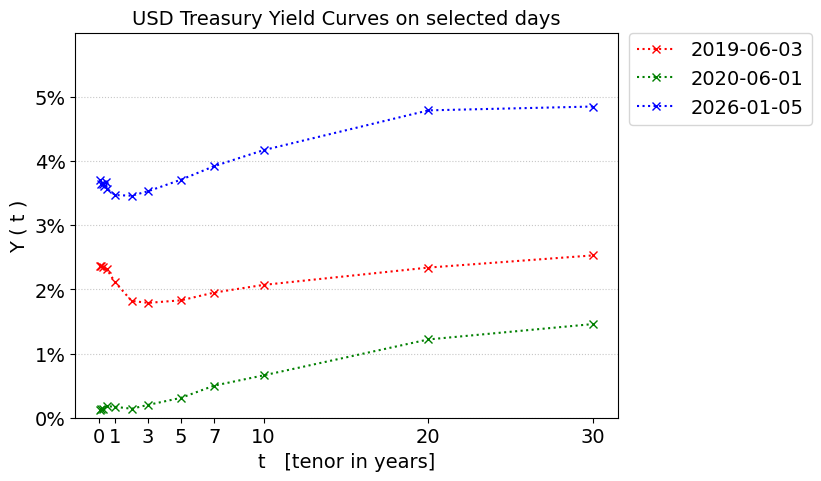

In [10]:
import matplotlib.pyplot as plt
import numpy as np


def compare_yield_curves():
    """
    Plot yield curves
    """
    # --- settings ---
    fontsize = 14  # font size for the text of the current plot
    xticks = [0, 12, 36, 60, 84, 120, 240, 360]
    yticks = range(0, 6)
    ylim = [0, 6]

    # --- plotting ---
    plt.plot(*zip(*sorted(y_2019_06_03.items())), 'rx:', markersize=6, label='2019-06-03', zorder=2)
    plt.plot(*zip(*sorted(y_2020_06_01.items())), 'gx:', markersize=6, label='2020-06-01', zorder=2)
    plt.plot(*zip(*sorted(y_2026_01_05.items())), 'bx:', markersize=6, label='2026-01-05', zorder=2)
    plt.title('USD Treasury Yield Curves on selected days', fontsize=fontsize)
    plt.xlabel('t   [tenor in years]', fontsize=fontsize)
    plt.ylabel('Y ( t )', fontsize=fontsize)
    ax = plt.gca()
    ax.set_xticks(xticks)
    # data measures tenor in months, on the plot we need years
    ax.set_xticklabels([str(int(tenor_measured_in_months/12)) for tenor_measured_in_months in xticks], 
                       fontsize=fontsize)
    ax.set_yticks(yticks)
    ax.set_yticklabels([str(y)+'%' for y in yticks], fontsize=fontsize)
    ax.set_ylim(ylim)
    plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0., fontsize=fontsize)
    plt.grid(visible=True, axis='y', linestyle=':', alpha=0.7, zorder=1)

    fig = plt.gcf()
    fig.set_size_inches([7, 5])
    plt.show()


compare_yield_curves()

## Risk-free rate and Discounting
### Risk-free investment (free of credit risk)

If you set up a contract, there is always a non-zero chance that something unexpected will happen.<br/>
The safest USD financial instruments are short-term US Treasury Bills.<br/>

Currently, short-term US T-Bills are the closest approximations of a risk-free investment<br/>
because the US Treasury is very likely to fulfill its payment obligations in the near future.

### Risk-free rate
The theoretical concept of a `risk-free rate` is the rate of a risk-free investment.<br/>
Note, however, that the actual value of the risk-free rate changes over time. This is called `interest rate risk`.

For example, you can enter a `risk-free` contract between now and time $\,T=3\,$ with an annualized percent yield of $\,\mathrm{APY}=2\%\,$.
<br/>
This risk-free contract will be a reference for all other contracts with the same tenor.


### Discounting
Assume that at $\,T=3\,$ you will receive the amount of $\,100\,$. 
<br/>
With the risk-free $\,\mathrm{APY}=2\%\,$, this $\,100\,$ received at $\,T=3\,$ 
has the following present value to you: 

$\displaystyle{\frac{100}{\left(\,1+\mathrm{APY}\,\right)^{\,3}} =\frac{100}{1.02^{\,3}}=94.23}\,$.  


This is called `discounting with the risk-free rate`.<br/>

### Task: PV of your future payments

1. You and a bank just signed a contract. For the next 30 years at the end of each month you will pay $\,m=1$ USD.
2. Select one of the above USD yield curves.
3. Between the tenor of 1 month and 360 months calculate each missing value with linear interpolation.
4. Convert each yield to APY.
5. Calculate the sum of the PVs of your payments.
6. Repeat the calculation with the other yield curve.
7. Why do you see a difference between the results obtained with the different yield curves ? 

###### Answer

_Helper functions: Linear interpolation, Discount factor, PV calculation_

In [11]:
import numpy as np
from numbers import Number

INTP_MAX_STEP_NUMBER = 1e+4
INTP_MIN_STEP_SIZE = 1.0e-6
NUMBER_OF_MONTHLY_PAYMENTS = 360


def interpolate_linear(xy_dict={}, x_from=None, x_to=None, x_step=None):
    """
    Linear interpolation of y(x) values at the x points  ( x_from, x_from + x_step,  x_from + 2 * x_step, ... )
    based on the y values at the nearest available x points. 

    The x value of the last interpolated point must be equal to or smaller than x_to.

    Available x, y pairs are listed in xy_dict.

    The returned dict contains all interpolated values.
    """
    xy_intp = dict()
    
    # --- testing inputs ---
    assert len(xy_dict.keys()) > 1, 'Interpolation needs at least two points'
    assert x_from is not None, 'Missing argument: x_from'
    assert x_to is not None, 'Missing argument: x_to'
    assert x_step is not None, 'Missing argument: x_step'

    assert all([isinstance(x, Number) for x in xy_dict.keys()]), 'All listed x values have to be numeric'
    assert all([isinstance(y, Number) for y in xy_dict.values()]), 'All listed y values have to be numeric'
    assert isinstance(x_from, Number), 'x_from has to be numeric'
    assert isinstance(x_to, Number), 'x_to has to be numeric'
    assert isinstance(x_step, Number), 'x_step has to be numeric'
    
    x_list, y_list = zip(*sorted(xy_dict.items()))
    x_intp = np.arange(x_from, x_to, x_step)  # x values of the interpolated points, np.arange allows float step
    
    assert x_list[0] <= x_intp[0], 'The x value of the first interpolated y must be >= the first available x value'
    assert x_intp[-1] <= x_list[-1], 'The x value of the last interpolated y must be <= the last available x value'
    assert x_step > 0.0, 'The step size between the x values of the interpolated points must be positive'
    assert x_intp[0] + x_step <= x_list[-1], 'Second x value of the interpolation must be <= the last available x value'

    assert (x_list[-1] - x_list[0]) / x_step <= INTP_MAX_STEP_NUMBER, \
            f'The maximum number of interpolation steps is {INTP_MAX_STEP_NUMBER}'
    assert all([x_list[i] - x_list[i - 1] >= INTP_MIN_STEP_SIZE for i in range(1, len(x_list))]), \
            f'The distance between neighboring listed x values has to be at least {INTP_MIN_STEP_SIZE}'
    
    # --- interpolation --- 
    i_intp = 0  # i_list and i_intp are the indexes of the known and requested x values
    i_list = 0
    while i_intp < len(x_intp) and i_list < len(x_list):
        # linear interpolation at x_intp[i_intp] based on the nearest available known values
        r = (x_intp[i_intp] - x_list[i_list]) / (x_list[i_list + 1] - x_list[i_list])
        xy_intp[x_intp[i_intp]] = r * y_list[i_list + 1] + (1.0 - r) * y_list[i_list]
        
        # move to the next interpolated point such that x_list[i_list] <= x_intp[i_intp] < x_list[i_list + 1]
        # note that the second comparison is a sharp < relation, in other words, equality is not allowed
        i_intp += 1
        if i_intp < len(x_intp):            
            while x_list[i_list + 1] <= x_intp[i_intp]:
                i_list += 1

    return xy_intp


def quoted_percent_yield_to_continuous_rate_and_discount_factor(quoted_percent_yield=None, tenor_in_years=None):
    annual_percent_yield = 100.0 * ( (1.0 + 0.5 * quoted_percent_yield / 100.0) ** 2.0 - 1.0 )
    continuous_rate = np.log(1.0 + tenor_in_years * annual_percent_yield / 100.0) / tenor_in_years
    discount_factor = np.exp(- 1.0 * continuous_rate * tenor_in_years)
    
    return continuous_rate, discount_factor
    

def calculate_pv(yield_curve_months=None, fixed_payment_amount=None):
    pv = 0.0
    y_intp = interpolate_linear(xy_dict=yield_curve_months, x_from=1, x_to=NUMBER_OF_MONTHLY_PAYMENTS, x_step=1)
    for tenor_in_months, quoted_percent_yield in y_intp.items():
        tenor_in_years = tenor_in_months / 12.0 
        _, discount_factor = quoted_percent_yield_to_continuous_rate_and_discount_factor(
            quoted_percent_yield=quoted_percent_yield, tenor_in_years=tenor_in_years)
        pv += fixed_payment_amount * discount_factor            

    return pv

_Calculate PVs_

In [12]:
FIXED_PAYMENT_AMOUNT = 1


for start_time, yield_curve_months in zip(['2019-06-03', '2026-01-05'], [y_2019_06_03, y_2026_01_05]):
    pv = calculate_pv(yield_curve_months=yield_curve_months, fixed_payment_amount=FIXED_PAYMENT_AMOUNT)
    print(f'Start time: {start_time}, '
          f'Fixed monthly payment amount: {FIXED_PAYMENT_AMOUNT}, '
          f'Number of monthly payments: {NUMBER_OF_MONTHLY_PAYMENTS}. '
          f'PV: {pv:.2f}')

Start time: 2019-06-03, Fixed monthly payment amount: 1, Number of monthly payments: 360. PV: 273.61
Start time: 2026-01-05, Fixed monthly payment amount: 1, Number of monthly payments: 360. PV: 226.84


Note the significant difference between the two PVs: $\,273.61\,$ vs $\,226.84\,$

What is the reason for this difference ? Can you explain based on the yield curves plotted above ?

# LIBOR vs SOFR

[**L**ondon **I**nter**B**ank **O**ffered **R**ate](https://www.investopedia.com/terms/l/libor.asp)

Average of the (top/bottom-)trimmed list of `opinions` of major banks on the `future` lending rate among themselves.


<br/>

[**S**ecured **O**vernight **F**inancing **R**ate](https://www.investopedia.com/secured-overnight-financing-rate-sofr-4683954)

Average short-term rate `now` (past business day) based on `large amounts of actual trade data`, for example, loans.

## Major Differences

1. LIBOR is forward looking, SOFR is backward looking
2. SOFR is only O${\,\mathit /\,}$N, LIBOR has many tenors
3. LIBOR contains credit risk, so SOFR usually is lower
4. SOFR is data-centric rather than expert opinion based

Due to 3. and 4., `SOFR is less volatile and harder to manipulate`.

# Credit

## Default and survival probability

`Default` (noun) is an event when one of the contractual parties fails to pay timely.
The verb for this is `to default`.

For a selected company, let us denote its `probability of default` between now (time $0$) and time $\,t>0\,$ by $\,{\mathrm{PD}}\left(\,0,\,t\,\right)\,$.

Inversely, the `survival probability` of the same company over the same time window is $\,S\left(\,0,\,t\,\right)=1-{\mathrm{PD}}\left(\,0,\,t\,\right)\,$.

If the first argument of the survival probability is zero, then it is practical to omit it. So we write $\,S\left(\,t\,\right)\,$.

##### Example

In 2008 Iceland's 3 major privately owned commercial banks defaulted.
<br/>
Their defaults also affected several of their non-Icelandic depositors.

## Unconditional default probability

From time $\,t\,$ to time $\,t+\Delta t\,$ the survival probability drops from $\,S\left(\,t\,\right)\,$ to 
$\,S\left(\,t+\Delta t\,\right)\,$.


In other words, in this time window the `unconditional default probability` is $\,S\left(\,t\,\right) - S\left(\,t+\Delta t\,\right)\,$.

## Hazard function

1. Let us now start by assuming that a company has survived (not defaulted) until time $\,t\,$.
<br/>
The probability of this event is $\,S\left(\,t\,\right)\,$.


2. Therefore, `default probability conditional on` no earlier default is 
$\,\displaystyle{\frac{S\left(\,t\,\right) - S\left(\,t+\Delta t\,\right)}{S\left(\,t\,\right)}}\,$.


3. In this $\,\Delta t\,$ long time window the `conditional rate of default` (also called: relative rate of default) is 
$\,\displaystyle{\frac{S\left(\,t\,\right) - S\left(\,t+\Delta t\,\right)}{S\left(\,t\,\right)\,\cdot\,\Delta t}}\,$.


4. The `hazard function` (also called: failure rate, or the `hazard rate`, or the `default intensity function`)<br/>
is the $\,\Delta t\to 0\,$ limiting case of the conditional rate of default:<br/>
$\,\displaystyle{
{\color{red} h\left(\,t\,\right)}=\
\frac{S\left(\,t\,\right) - S\left(\,t+\Delta t\,\right)}{S\left(\,t\,\right)\,\cdot\,\Delta t}\Bigg|_{\,\Delta t\,\to\,0}\!\!=\
\!-\,\frac{1}{S\left(\,t\,\right)}\cdot\frac{ S\left(\,t+\Delta t\,\right)-S\left(\,t\,\right)}{\Delta t}\Bigg|_{\,\Delta t\,\to\,0}\!\!=\\
\!-\,\frac{1}{S\left(\,t\,\right)}\cdot\frac{d}{dt}S\left(\,t\,\right)=\
\!{\color{red}-\frac{d}{dt}\,\ln S\left(\,t\,\right)}
}\,$


5. Note that the hazard function is the rate of default at time $\,t\,$ with the condition that the company has survived until that time.

# Recommended reading

The banking crisis in Iceland. Financial Stability Institute, FSI Crisis Management Series No 1. https://www.bis.org/fsi/fsicms1.pdf

# Example questions

## Forward rate

##### Question
If the $\,\mathrm{3Y}\,$ bond pays $\,4\%\,$, and the $\,\mathrm{5Y}\,$ bond pays $\,4.5\%\,$, then what is the $\,\mathrm{3Y}\to\mathrm{5Y}\,$ forward rate ?
##### Answer

The $\,\mathrm{3Y}\to\mathrm{5Y}\,$ forward rate is $\,r_{3,5}\,$ with semi-annual compounding :

$\displaystyle{
\left(\,1+\frac{0.04}{2}\,\right)^6 \,
\left(\,1+\frac{r_{3,5}}{2}\,\right)^4  
\, = \,
\left(\,1+\frac{0.045}{2}\,\right)^{10}
\\
\,\,\, \Rightarrow \,\,\,
r_{3,5} \, = \,  2 \, \left(\left(\,1+\frac{0.045}{2}\,\right)^{2.5} \left(\,1+\frac{0.04}{2}\,\right)^{-1.5} - 1 \right)
\: \thickapprox \:
5.252 \%
}$

In [13]:
r3 = 0.04
r5 = 0.045
r35 = 2 * ((1+0.045/2)**2.5 * (1+0.04/2)**(-1.5) - 1)

print(f'r(3,5) = {100*r35:.3f}%')

r(3,5) = 5.252%
